# Final Project - Part 2 Regression

##  Research question: Audience rating prediction based on amount of votes.

In this project our goal is to find the connection between the movies' amount of votes and the movies' audience rating. 

We used web-scraping in order to get data from IMBD.

The websites' link is: https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating. 

# Table of Contents

### 1- Checking the Data
### 2- Cleaning the Data
### 3- Splitting the Data
### 4- Visualization
### 5- Searching for Correlation
### 6- Comparing 3 Models
### 7- Evaluating the Chosen Model
### 8- Dummy Model
### 9- Testing our model & analyzing

## changes:

###### in semster b we changed our project a bit.
###### first, we went over our data, cleaned it better and displayed it.
###### second, we added new models, and tested them. the new models are linear kernel, polynomial kernel and random forest regressor.
we saw that our modelss from last semester were better therefore we didnt change anything else 

# 1 - Checking the Data

### About our Data..

- Title : the name of the movie.
- Rating : rating of the movie
- Votes : the amount of votes each movie got.
- Years : the year that the movie was realesed.
- Runtime : the time-lenght of the movie. 

importing the needed libraries:

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline
import scipy.stats as stats
import urllib
import requests

#Importing libraries for cleaning data
from sklearn.preprocessing import OneHotEncoder

#Importing r2 as a metric measure
from sklearn.metrics import r2_score

#Importing scatter_matrix for visualization and correlation
from pandas.plotting import scatter_matrix

#Importing libraries for model use
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#Importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

grabbing our data from the csv file 

In [5]:
df=pd.read_csv('FINAL-DATA .csv')

Let's take a quick look at our data:

In [38]:
df.head(10)

,Title,Rating,Votes,Genre,Years,Runtime
0,Jai Bhim,9.3,"175,343","Crime, Drama, Mystery",(2021),164 min
1,The Shawshank Redemption,9.3,"2,549,198",Drama,(1994),142 min
2,The Godfather,9.2,"1,753,345","Crime, Drama",(1972),175 min
3,Soorarai Pottru,9.1,"107,606",Drama,(2020),153 min
4,The Dark Knight,9.0,"2,499,654","Action, Crime, Drama",(2008),152 min
5,The Godfather: Part II,9.0,"1,215,898","Crime, Drama",(1974),202 min
6,12 Angry Men,9.0,"753,325","Crime, Drama",(1957),96 min
7,The Lord of the Rings: The Return of the King,8.9,"1,757,046","Action, Adventure, Drama",(2003),201 min
8,Pulp Fiction,8.9,"1,960,320","Crime, Drama",(1994),154 min
9,Schindler's List,8.9,"1,301,020","Biography, Drama, History",(1993),195 min


understanding the data better:

In [7]:
print(df.shape)

(400, 6)


In [10]:
df.info

<bound method DataFrame.info of                         Title  Rating      Votes  \
0                    Jai Bhim     9.3    175,343   
1    The Shawshank Redemption     9.3  2,549,198   
2               The Godfather     9.2  1,753,345   
3             Soorarai Pottru     9.1    107,606   
4             The Dark Knight     9.0  2,499,654   
..                        ...     ...        ...   
395                   Sabrina     7.6     63,462   
396     From Here to Eternity     7.6     46,088   
397                     Gilda     7.6     31,598   
398                  Lifeboat     7.6     28,457   
399              The 39 Steps     7.6     55,794   

                                     Genre   Years  Runtime  
0        Crime, Drama, Mystery              (2021)  164 min  
1                        Drama              (1994)  142 min  
2                 Crime, Drama              (1972)  175 min  
3                        Drama              (2020)  153 min  
4         Action, Crime, Drama   

Checking for null values in our data:

In [8]:
df.isnull().values.any()

False

## 2- Cleaning the Data

while doing web-scraping, we chose each specific column. 




### cleaning the genres

When we try to check how many ratings we have per genre, we will notice that there're movies that have a coulple of genres. Therefore, we can't count the amount of genres individually.  

In [41]:
df.Genre.value_counts()

Drama                                    32
Action, Crime, Drama                     17
Drama, Romance                           15
Crime, Drama, Mystery                    14
Comedy, Drama, Romance                   13
                                         ..
Fantasy, Horror                           1
Drama, Mystery, Sci-Fi                    1
Action, Adventure, Family                 1
Drama, Fantasy, Music                     1
Action, Adventure, War                    1
Name: Genre, Length: 128, dtype: int64

In order to deal with this problem, we wrote a code that goes-over each genre in our DataFrame and counts the amount of times it appears, and simultaneously we cleaned that data.

In [14]:
generes_count = {}
raw_generes = df.get('Genre')

for generes_row_str in raw_generes:
    
    generes = generes_row_str.strip().split(', ')
    
    for genere in generes: 
        
        if generes_count.get(genere, None):
            generes_count[genere] += 1
        else:
            generes_count[genere] = 1

for genere, amount in generes_count.items():
    print(f'{genere}: {amount}')


Crime: 83
Drama: 304
Mystery: 44
Action: 100
Adventure: 77
Biography: 50
History: 23
Sci-Fi: 23
Romance: 49
Western: 8
Fantasy: 22
War: 30
Comedy: 66
Thriller: 58
Animation: 31
Family: 20
Music: 9
Horror: 19
Film-Noir: 5
Sport: 7
Musical: 2


###### Making the genres numeric

In [15]:
generes = generes_count.keys()
generes_mapping = []
for index, genere in enumerate(generes):
    generes_mapping.append([genere, index])
    
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(generes_mapping)

OneHotEncoder(handle_unknown='ignore')

In [16]:
genres_map_new = {}
print(generes)
for index, genre in enumerate(generes):
    genres_map_new[genre]= index   

raw_genres = df['Genre']
converted_genres = []

for genre_row in raw_genres:
    current_genres = genre_row.strip().split(', ')
    converted_row_genres = []
    for genre in current_genres:
        mapped_genre = (genres_map_new[genre])
        converted_row_genres.append(mapped_genre)
    converted_genres.append(converted_row_genres)
    
converted_df = df.assign(Genre=converted_genres).explode('Genre')
converted_df

dict_keys(['Crime', 'Drama', 'Mystery', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'War', 'Comedy', 'Thriller', 'Animation', 'Family', 'Music', 'Horror', 'Film-Noir', 'Sport', 'Musical'])


,Title,Rating,Votes,Genre,Years,Runtime
0,Jai Bhim,9.3,"175,343",0,(2021),164 min
0,Jai Bhim,9.3,"175,343",1,(2021),164 min
0,Jai Bhim,9.3,"175,343",2,(2021),164 min
1,The Shawshank Redemption,9.3,"2,549,198",1,(1994),142 min
2,The Godfather,9.2,"1,753,345",0,(1972),175 min
...,...,...,...,...,...,...
398,Lifeboat,7.6,"28,457",1,(1944),97 min
398,Lifeboat,7.6,"28,457",11,(1944),97 min
399,The 39 Steps,7.6,"55,794",0,(1935),86 min
399,The 39 Steps,7.6,"55,794",2,(1935),86 min


In [76]:
for index, genere in enumerate(generes):
    generes_map_new[genere]= index   
print(generes_map_new)

{'Crime': 0, 'Drama': 1, 'Mystery': 2, 'Action': 3, 'Adventure': 4, 'Biography': 5, 'History': 6, 'Sci-Fi': 7, 'Romance': 8, 'Western': 9, 'Fantasy': 10, 'War': 11, 'Comedy': 12, 'Thriller': 13, 'Animation': 14, 'Family': 15, 'Music': 16, 'Horror': 17, 'Film-Noir': 18, 'Sport': 19, 'Musical': 20}


### cleaning the years

we wanted to get rid of the brackets, and make the numbers, numbers.

In [44]:
raw_years = converted_df.get('Years')
years = []

for raw_year in raw_years:
    
    if isinstance (raw_year , str):
        raw_year = raw_year.split(' ')[-1]
        year = int(raw_year.strip('()'))
        
    elif isinstance (raw_year, int):
        year= raw_year
        
    else:
        continue
    
    year = raw_year.strip('()')
    years.append(year)
    
converted_df['Years'] = years


In [45]:
df.Years

0      2021
1      1994
2      1972
3      2020
4      2008
       ... 
395    1954
396    1953
397    1946
398    1944
399    1935
Name: Years, Length: 400, dtype: object

### cleaning the run-time

we wanted to make the runtime as int, and clean the data-erasing unwanted empty spaces and 0.

In [46]:
raw_runtimes = converted_df.get('Runtime')
runtimes = []

for raw_runtime in raw_runtimes:
    
    if isinstance(raw_runtime, str):
        runtime = int(raw_runtime.split(' ')[0])
    
    elif isinstance(raw_runtime, int):
        runtime = raw_runtime
    
    else:
        continue
    
    runtimes.append(runtime)
    
    
converted_df['Runtime'] = runtimes


In [47]:
df.Runtime

0      164
1      142
2      175
3      153
4      152
      ... 
395    113
396    118
397    110
398     97
399     86
Name: Runtime, Length: 400, dtype: int64

### cleaning the votes

we wanted to make the votes as int, and clean the data -erasing unwanted empty spaces and commas.

In [48]:
raw_votes = converted_df.get('Votes')
votes = []

for raw_vote in raw_votes:
    
    if isinstance(raw_vote, str):
        vote = int(raw_vote.replace(',', ''))
    
    elif isinstance(raw_vote , int):
        vote = raw_vote

    else:
        continue 

    votes.append(vote)
    
converted_df['Votes'] = votes


In [49]:
df.Votes

0       175343
1      2549198
2      1753345
3       107606
4      2499654
        ...   
395      63462
396      46088
397      31598
398      28457
399      55794
Name: Votes, Length: 400, dtype: int64

### cleaning the ratings

we wanted to make the ratings as float.

In [50]:
raw_ratings = converted_df.get('Rating')
ratings = []

for raw_rating in raw_ratings:

    if isinstance(raw_rating, str):
        rating = float(raw_rating)
    
    elif isinstance(raw_rating, float):
        rating = raw_rating
    
    else:
        continue

        
    ratings.append(rating)

converted_df['Rating'] = ratings


In [51]:
df.Rating

0      9.3
1      9.3
2      9.2
3      9.1
4      9.0
      ... 
395    7.6
396    7.6
397    7.6
398    7.6
399    7.6
Name: Rating, Length: 400, dtype: float64

Seeing the our new DataFrame all clean  

In [52]:
converted_df

,Title,Rating,Votes,Genre,Years,Runtime
0,Jai Bhim,9.3,175343,0,2021,164
0,Jai Bhim,9.3,175343,1,2021,164
0,Jai Bhim,9.3,175343,2,2021,164
1,The Shawshank Redemption,9.3,2549198,1,1994,142
2,The Godfather,9.2,1753345,0,1972,175
...,...,...,...,...,...,...
398,Lifeboat,7.6,28457,1,1944,97
398,Lifeboat,7.6,28457,11,1944,97
399,The 39 Steps,7.6,55794,0,1935,86
399,The 39 Steps,7.6,55794,2,1935,86


###### now that our data is clean, we can check the avarege rating in comparison to each column:

In [54]:
#Creating mean_df
grouped_df = converted_df.groupby("Rating")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

,Rating,Votes,Runtime
0,7.6,2.338657e+05,118.515982
1,7.7,7.194230e+04,106.513514
2,7.8,2.518364e+05,124.634328
3,7.9,9.419700e+04,94.000000
4,8.0,3.626256e+05,129.082090
5,8.1,9.517984e+04,124.568966
6,8.3,1.341046e+05,135.846154
7,8.4,5.433965e+05,133.658228
8,8.5,7.782661e+05,118.444444
9,8.6,8.777087e+05,142.256410


## 3- Splitting the Data - train & test 

### Dividing the Data into a test set (20%) and train set (80%)

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. 

The first subset is used to fit the model and is referred to as the training dataset. 

The second subset is provided to the model, then predictions are made and compared to the expected values. 

This second dataset is referred to as the test dataset.

In [61]:
train_set, test_set = train_test_split(converted_df, test_size = 0.2, random_state=35)

In [62]:
train_set

,Title,Rating,Votes,Genre,Years,Runtime
299,La double vie de Véronique,7.8,47096,1,1991,98
151,Togo,8.0,45904,1,1988,113
264,The Curious Case of Benjamin Button,7.8,628698,8,2008,166
330,Philomena,7.6,98579,1,2013,98
220,Pride,7.8,55291,5,2014,119
...,...,...,...,...,...,...
71,The Dark Knight Rises,8.4,1620268,1,2012,164
288,Gattaca,7.8,295115,7,1997,106
372,The Thin Red Line,7.6,183986,11,1998,170
390,Kelly's Heroes,7.6,48435,11,1970,144


In [63]:
test_set

,Title,Rating,Votes,Genre,Years,Runtime
351,Harry Potter and the Half-Blood Prince,7.6,520510,3,2009,153
322,Gifted,7.6,111614,1,2017,101
168,Blade Runner 2049,8.0,529201,3,2018,164
186,The Pursuit of Happyness,8.0,488759,5,1957,117
206,Isle of Dogs,7.8,160331,12,2018,101
...,...,...,...,...,...,...
309,The Ladykillers,7.7,28781,0,1955,91
253,The Hobbit: An Unexpected Journey,7.8,797453,4,2012,169
307,Invasion of the Body Snatchers,7.7,48428,7,1956,80
152,Airlift,8.0,55967,1,1985,130


#### Making sure that there aren't any null values

In [64]:
train_set.isnull().sum()

Title      0
Rating     0
Votes      0
Genre      0
Years      0
Runtime    0
dtype: int64

In [65]:
test_set.isnull().sum()

Title      0
Rating     0
Votes      0
Genre      0
Years      0
Runtime    0
dtype: int64

In [66]:
x_train = train_set[['Genre', 'Years','Runtime','Votes']]
y_train = train_set['Rating']

x_test = test_set[['Genre', 'Years' , 'Runtime' , 'Votes']]
y_test = test_set['Rating']

##  4- Visualization

#### This bar plot shows us the different genres and the amount of each genre in our dataset.

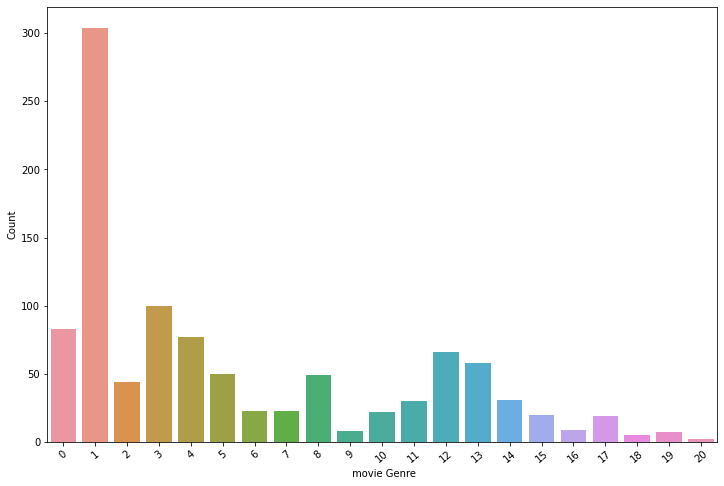

In [69]:
plt.figure(figsize=(12,8))
counts = converted_df.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel(' movie Genre')
plt.ylabel('Count')
plt.xticks(rotation=40);

#### In these histograms you can see the numeric data in ranges, where each bar represents how frequently numbers fall into a particular range.

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Votes'}>],
       [<AxesSubplot:title={'center':'Runtime'}>, <AxesSubplot:>]],
      dtype=object)

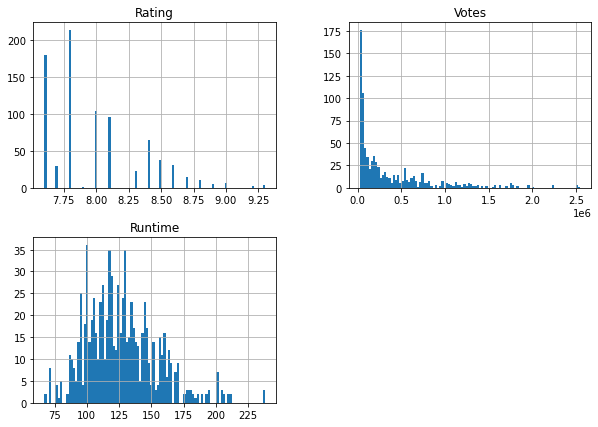

In [70]:
fig_size=(20,15)
train_set.hist(bins=100, figsize=(10,7))

## 5- Searching for Correlation

Correlation is a term used to represent the statistical measure of linear relationship between two variables. 
It can also be defined as the measure of dependence between two different variables. 
If there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used.

array([[<AxesSubplot:xlabel='Rating', ylabel='Rating'>,
        <AxesSubplot:xlabel='Votes', ylabel='Rating'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Rating'>],
       [<AxesSubplot:xlabel='Rating', ylabel='Votes'>,
        <AxesSubplot:xlabel='Votes', ylabel='Votes'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Votes'>],
       [<AxesSubplot:xlabel='Rating', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Votes', ylabel='Runtime'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Runtime'>]], dtype=object)

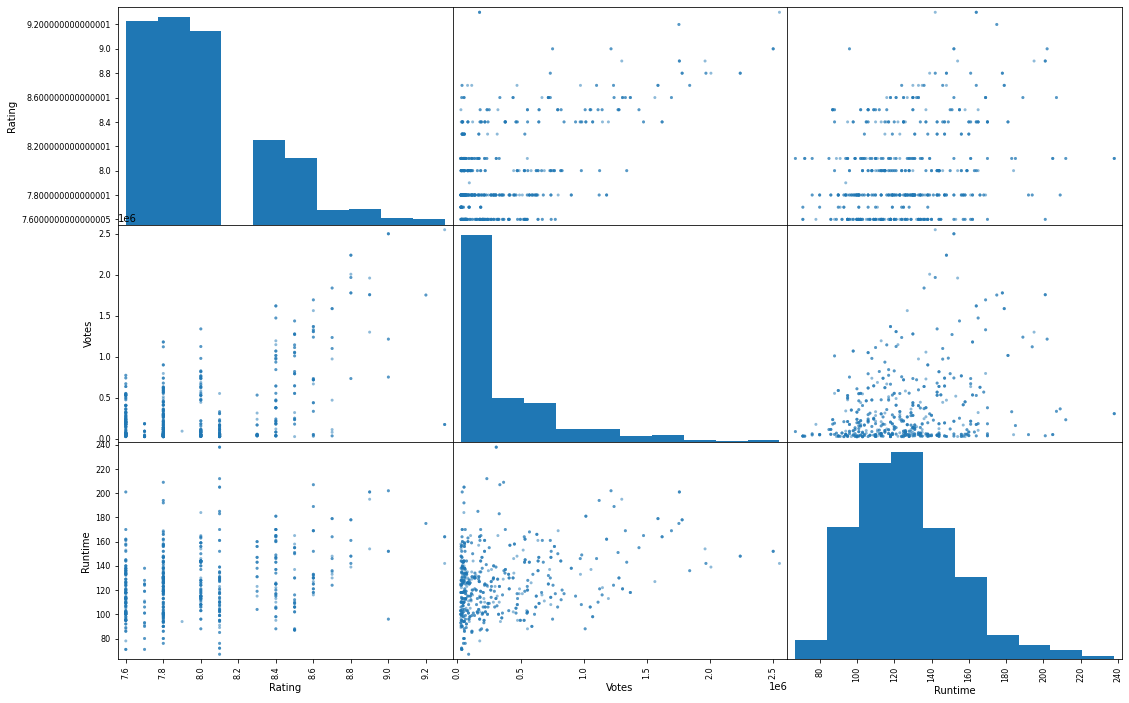

In [71]:
scatter_matrix(train_set, figsize=(18, 12))

#### Scatterplots show possible associations or relationships between two variables. We can see that there is a moderate positive relationship between the Rating and Votes.

<AxesSubplot:>

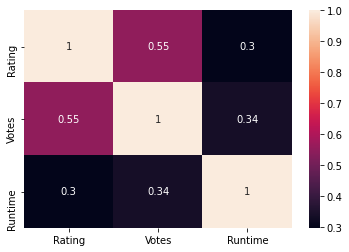

In [199]:
sns.heatmap(train_set.corr(), annot = True)

#### According to the heatmap, we can see that there is a partial correlation between the rating and the amount of votes. In comparison to other variables from the dataset, the amount of votes has greater correlation than the rest of the categories.

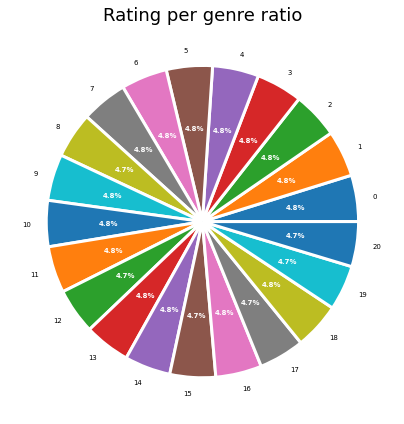

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))

grouped_genre = converted_df.groupby("Genre")
genre_df = grouped_genre.mean()
genre_df = genre_df.reset_index()

x= genre_df['Rating']
labels= genre_df['Genre']

# Capture each of the return elements
patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-small'})

# Style the percent values
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Rating per genre ratio', fontsize=18)
plt.tight_layout()

#### With this pie chart we can see that the average rating per genre is approximately the same for each genre. Therefore, there might be slim to no correlation at all between the two.

# 6- Comparing the Models

### R squared scoring explained

We will use R2 as our scoring system. R-squared is a statistical measure of how close the data is to the fitted regression line. It is also known as the coefficient of determination.The r2 score for perfect model is 1.0.
On the other hand, the r2 score for a model which predicts mean value is 0.0.

The formula for calculating R2 is as follows:
R2 = (var(mean) – var(line))/var(mean) = 1-(var(line)/var(mean))

### Linear regression

Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables

In [77]:
linear_reg = linear_model.LinearRegression()
folds = KFold(n_splits = 14, shuffle = True, random_state = 42)

In [78]:
l_scores = cross_val_score(linear_reg, x_train, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[ 0.1881363   0.33750035  0.30325487  0.50892961  0.45796196  0.30642784
  0.4243119  -0.01950881  0.07887765  0.39544527  0.36085312  0.31850247
  0.36398236  0.32529274]


0.31071197327785666

### knn

The KNN algorithm assumes that similar things exist close to one another.

In [79]:
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, x_train, y_train, scoring='r2', cv=folds)
print(knn_scores)
np.mean(knn_scores)

[0.44785613 0.47847663 0.55339034 0.69671968 0.59643658 0.49032598
 0.4073486  0.32850777 0.31931666 0.44460467 0.59165648 0.38081012
 0.44434419 0.49032868]


0.4764373226978444

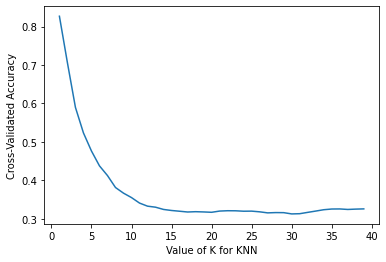

In [175]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_reg, x_train, y_train, cv=folds, scoring='r2')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Decision Tree Regressor

 decision tree regressor builds regression or classification models in the form of a tree structure

In [187]:
regressor = DecisionTreeRegressor(max_depth=22)
dt_scores= cross_val_score(regressor, x_train, y_train, cv=folds, scoring='r2')
print(dt_scores)
np.mean(dt_scores)

[0.66569035 0.8066235  0.80468966 0.77450376 0.81887347 0.91514861
 0.80587952 0.15326673 0.59562171 0.87931384 0.84841934 0.7809883
 0.8675146  0.94495355]


0.7615347805947911

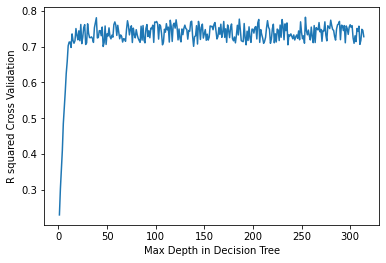

In [192]:
k_range = range(1, 315)
k_scores = []

for k in k_range:
    dtr = DecisionTreeRegressor(max_depth=k)
    scores = cross_val_score(dtr, x_train, y_train, cv=folds, scoring='r2')
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Max Depth in Decision Tree')
plt.ylabel('R squared Cross Validation')
plt.show()

### linear kernel

linear kernel isws used when the data is Linearly separable, that is, it can be separated using a single Line.  It is mostly used when there are a Large number of Features in a particular Data Set. it devides the data with a single line.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [208]:
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3)

In [215]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(svr_lin, x_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(svr_lin, x_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.365731412632751
642.8643367786706


### Polynomial kernel

 polynomial kernel, represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

In [213]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(svr_poly, x_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
y_predict = cross_val_predict(svr_poly, x_train, y_train, cv=kf)
mae = MAE(y_train,y_predict)
print(scores.mean())
print(mae)

0.447641578997086
502.6203759005602


### random forest regressor

In [218]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
RFR = RandomForestRegressor(n_estimators =36,min_samples_split = 10,min_samples_leaf = 4,max_features ='sqrt',max_depth = 20,bootstrap = True)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
R2 = cross_val_score(RFR, x_train, y_train, cv=kf, scoring='r2')
y_predict = cross_val_predict(RFR, x_train, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict)
print("R2 score:" +(str)(R2.mean()))
print("MAE score:" +(str)(mae_standarsized))

R2 score:0.5839649060857325
MAE score:415.5191595822072


## as we can see our best model is decision tree

# 7-  Evaluating the Chosen Model

as we can see our best model is decision tree

Using cross validation in order to evaluate further the Decision Tree Model in order to choose the right max depth. 

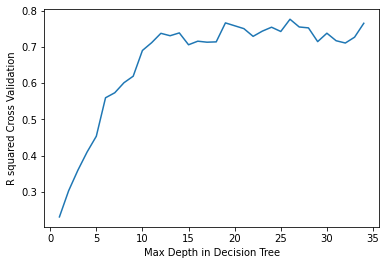

In [220]:
k_range = range(1, 35)
k_scores = []

for k in k_range:
    dtr = DecisionTreeRegressor(max_depth=k)
    scores = cross_val_score(dtr, x_train, y_train, cv=folds, scoring='r2')
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Max Depth in Decision Tree')
plt.ylabel('R squared Cross Validation')
plt.show()

# 8- Dummy Model

The Dummy Regressor is a kind of Regressor that gives prediction based on simple strategies without paying any attention to the input Data.

To understand how better both the model performed the evaluation metrics such as mean squared error, median absolute error and r2_ score are calculated for both the linear and dummy models.

In [89]:
regressor = DecisionTreeRegressor(max_depth=22) 
regressor.fit(x_train, y_train)

dummy_mean = DummyRegressor(strategy = 'mean').fit(x_train, y_train)
y_predict = regressor.predict(x_test)
y_predict_dummy_mean = dummy_mean.predict(x_test)

In [90]:
y_predict

array([7.6, 7.6, 8. , 8. , 7.8, 8.4, 8. , 8.9, 7.7, 7.6, 7.8, 7.6, 7.6,
       7.8, 7.6, 8. , 7.8, 8.7, 8.1, 8.5, 7.8, 7.8, 7.8, 7.8, 8. , 8.6,
       7.6, 7.9, 8. , 7.8, 7.6, 8.4, 7.8, 8.4, 8.7, 8.4, 8.7, 7.6, 8.1,
       8.6, 7.8, 7.8, 8.6, 7.8, 8. , 7.6, 8. , 7.6, 8.4, 8.1, 7.8, 7.8,
       7.6, 8. , 7.8, 7.8, 8.6, 7.7, 8. , 8.5, 8. , 8. , 7.6, 8. , 8.1,
       7.6, 8.4, 8.7, 8. , 7.8, 7.6, 7.6, 8. , 8.3, 7.6, 7.6, 8. , 8.3,
       8.7, 7.8, 7.6, 7.8, 7.8, 7.8, 8.7, 7.8, 8.5, 7.6, 8.5, 8.4, 8. ,
       8. , 8.5, 8. , 8.4, 7.8, 8.5, 7.6, 7.8, 7.6, 8.4, 7.8, 8.4, 7.6,
       8.1, 8.5, 7.8, 7.6, 8. , 7.8, 8.7, 8.5, 7.8, 7.6, 8.9, 7.8, 7.6,
       8.1, 8.9, 8.4, 7.8, 8.4, 7.8, 7.8, 8.3, 8.7, 8. , 7.6, 8.1, 8.4,
       7.6, 7.6, 8.1, 7.8, 8.1, 7.6, 7.8, 7.8, 7.8, 8. , 8.4, 8.5, 7.6,
       8. , 7.8, 7.8, 7.6, 7.6, 7.6, 7.8, 7.8, 8.1, 8.4, 8.6, 7.8, 8. ,
       7.6, 7.6, 8. , 8. , 7.8, 8.1, 8.6, 8. , 7.6, 8.6, 8. , 8.5, 7.6,
       8. , 7.6, 8.3, 8.1, 7.8, 7.7, 8. , 8.5, 8.1, 8.4, 7.6, 8.

In [91]:
print("R squared score for Dummy Model): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))

R squared score for Dummy Model): -0.00


# 9- croos val 

In [219]:
scores = cross_val_score(knn_reg, X=x_train, y=y_train, scoring='r2', cv=folds)
print(scores)
np.mean(scores)

[0.20542382 0.26783795 0.36466583 0.57344732 0.48547567 0.27324264
 0.43204587 0.19135421 0.11765083 0.42489984 0.38224032 0.38655528
 0.17245622 0.2844872 ]


0.32584164244750874